
# Exercise 3

In a chemical process, data related to the concentration of a given component are measured every two hours. 197 consecutive observations are stored in `ESE4_ex3.csv` (time series ‘A’ “Time Series Analysis – 3rd edition” Box Jenkins Reinsel – Prentice Hall)  


Estimate the most suitable ARIMA model.

In [15]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Import the dataset
data = pd.read_csv('ESE4_ex3.csv')

# Inspect the dataset
data.head()

,EXE3
0,17.0
1,16.6
2,16.3
3,16.1
4,17.1


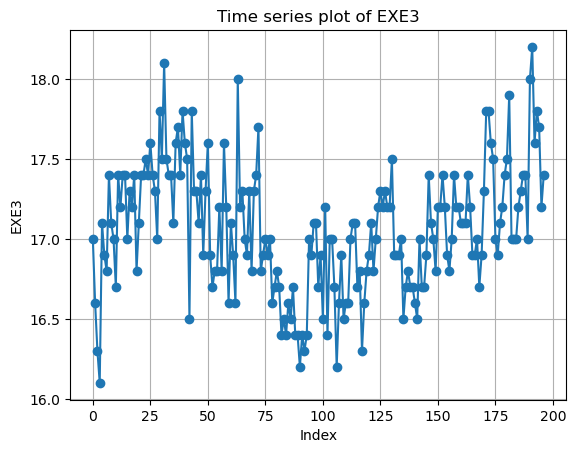

In [16]:
# Plot the data 
plt.plot(data['EXE3'], 'o-')
plt.xlabel('Index')
plt.ylabel('EXE3')
plt.title('Time series plot of EXE3')
plt.grid()
plt.show()

Runs test p-value = 0.000


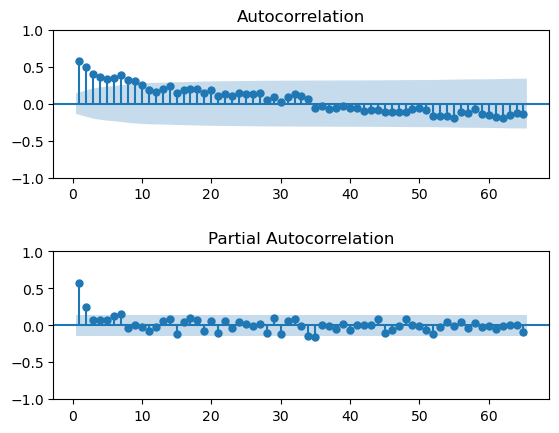

In [17]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['EXE3'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['EXE3'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['EXE3'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> The process is not stationary. Let's try to use the differencing operation

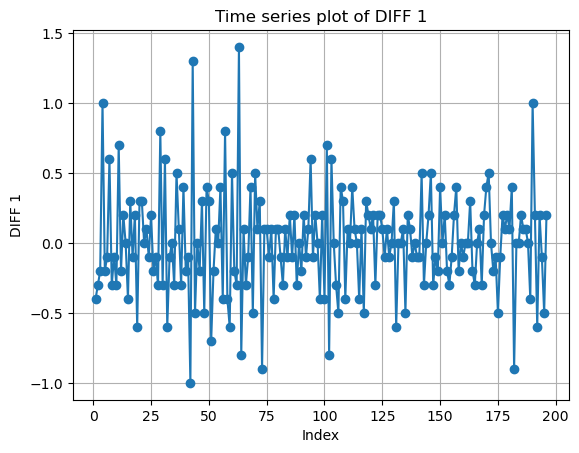

In [18]:
data['diff1'] = data['EXE3'].diff(1)

plt.plot(data['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.003


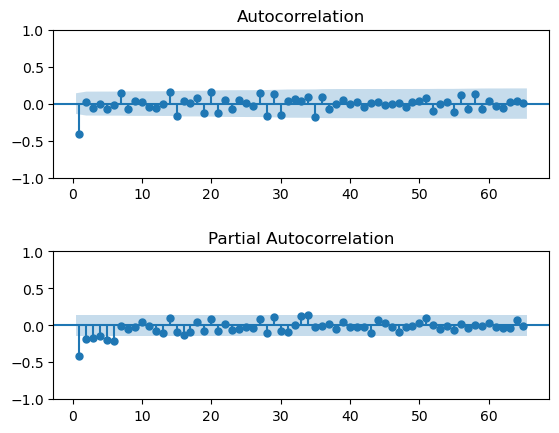

In [19]:
_, pval_runs = runstest_1samp(data['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['diff1'][1:], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> After the differencing operation and the ACF/PACF plots, we can try an ARIMA(0, 1, 1) model. Let's try to keep the constant term. 
> 
> <t1 style="color:red"> Remind: parsimony! </t1>

In [20]:
#calculate an ARIMA model: import the necessary library
import qda

# fit model ARIMA with constant term
model = qda.ARIMA(data['EXE3'], order=(0,1,1), add_constant=True)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value    P-Value
const  0.0040   0.0069   0.5829 5.5998e-01
ma.L1 -0.7044   0.0581 -12.1304 7.2921e-34

RESIDUAL SUM OF SQUARES
-------------------------
   DF      SS     MS
194.0 19.8286 0.1022

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12     20.6433   0.0559
  24     32.2974   0.1198
  36     55.7981   0.0187
  48     60.5529   0.1055


> The constant term is not significant, remove it and fit the model again. 

In [21]:
# fit model ARIMA without constant term
model = qda.ARIMA(data['EXE3'], order=(0,1,1), add_constant=False)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value    P-Value
ma.L1 -0.6994   0.0576 -12.1454 6.0719e-34

RESIDUAL SUM OF SQUARES
-------------------------
   DF      SS     MS
195.0 19.8607 0.1018

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12     20.6672   0.0555
  24     32.3947   0.1175
  36     55.9565   0.0181
  48     60.6505   0.1040


> The calculated ARIMA model is in the form of an IMA(1,1):
>
> $$Y_t - Y_{t-1} = \nabla Y_t =  \theta_{1}  \epsilon_{t-1} + \epsilon_t $$
>
> Finally, check the assumptions on residuals

Shapiro-Wilk test p-value = 0.165


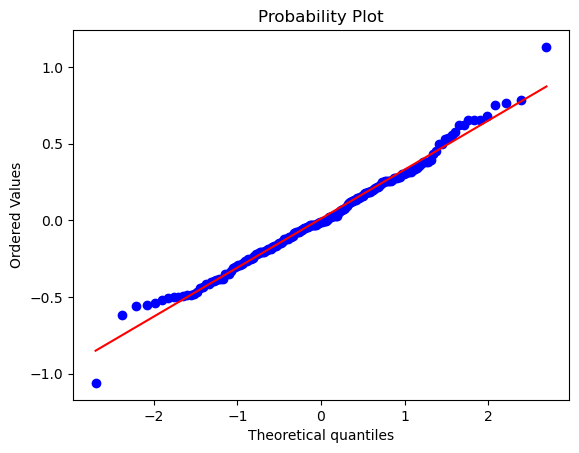

In [22]:
#extract the residuals
residuals = model.resid[1:] 

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

Runs test p-value = 0.002


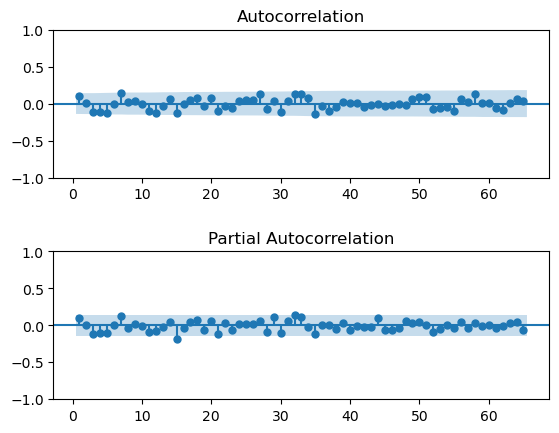

In [23]:
_, pval_runs = runstest_1samp(residuals, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

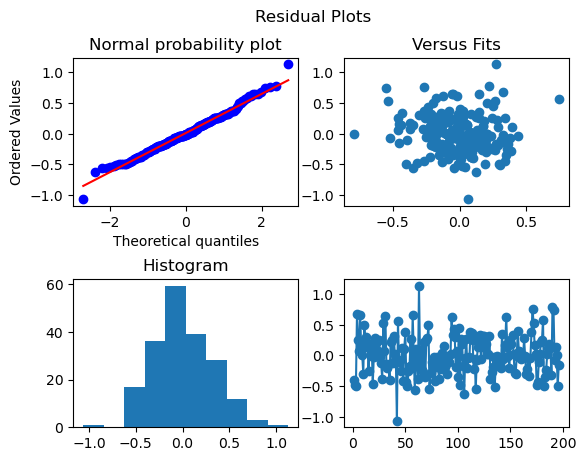

In [24]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues[1:], model.resid[1:])
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()